# IMPORT LIBS - SET PATH - SET CLASSES

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pathlib import Path
from fastai import *
from fastai.vision import *

In [3]:
torch.cuda.is_available()

True

In [8]:
PATH = 'data/renders/'
bs = 64
model_id = 'model-1'
tfms = []
size = 80

In [9]:
def load_images():
    p = Path(PATH)
    files = []
    classes = []
    for subdir in p.ls():
        for fn in subdir.glob('*.png'):
            files.append(fn)
            classes.append(subdir.name)

    return ImageDataBunch.from_lists(PATH, files, classes, ds_tfms=tfms, bs=bs, size=size)

data = load_images()


In [10]:
print(len(data.classes), data.classes)


8 ['c', 'cpp', 'csharp', 'go', 'java', 'python', 'ruby', 'rust']


In [7]:
data.show_batch(rows=2, figsize=(15, 15), dpi = 60)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 11: invalid start byte

# TRAIN MODEL

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])

# TRAIN FINAL LAYER

In [9]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.303475,1.128684,0.424167,0.575833,02:49
1,0.814754,0.685135,0.249250,0.750750,02:41
2,0.605305,0.519823,0.189167,0.810833,02:41
3,0.497402,0.443099,0.157250,0.842750,02:38
4,0.445794,0.420768,0.153000,0.847000,02:40
5,0.400257,0.412451,0.148000,0.852000,02:40


In [10]:
learn.save(f'{model_id}-stage-1')

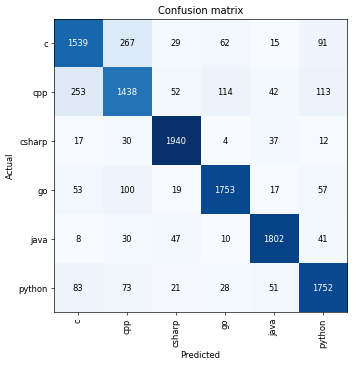

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

# TRAIN MODEL

In [12]:
learn.unfreeze()

In [13]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.208423,0.190301,0.069583,0.930417,03:06


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


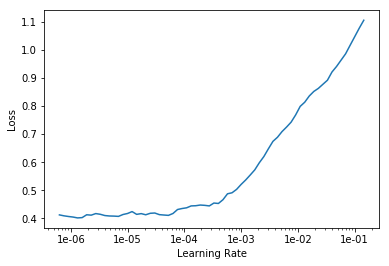

In [14]:
learn.load(f'{model_id}-stage-1')
learn.lr_find()
learn.recorder.plot()

In [15]:
learn.unfreeze()

In [16]:
learn.fit_one_cycle(8, slice(1e-4, 1e-6))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.355306,0.345279,0.121417,0.878583,03:07
1,0.274473,0.274898,0.100500,0.899500,03:06
2,0.219303,0.207939,0.075250,0.924750,03:06
3,0.133683,0.176424,0.062750,0.937250,03:06
4,0.083826,0.176649,0.061000,0.939000,03:07
5,0.044411,0.168771,0.055083,0.944917,03:02
6,0.024635,0.169200,0.053417,0.946583,03:05
7,0.022673,0.167943,0.053500,0.946500,03:07


# RESULTS

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

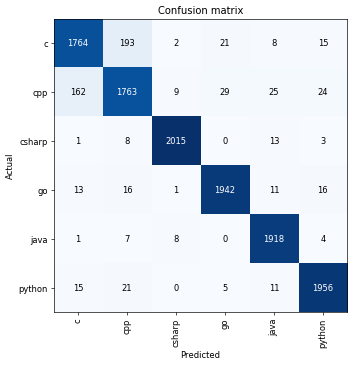

In [18]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

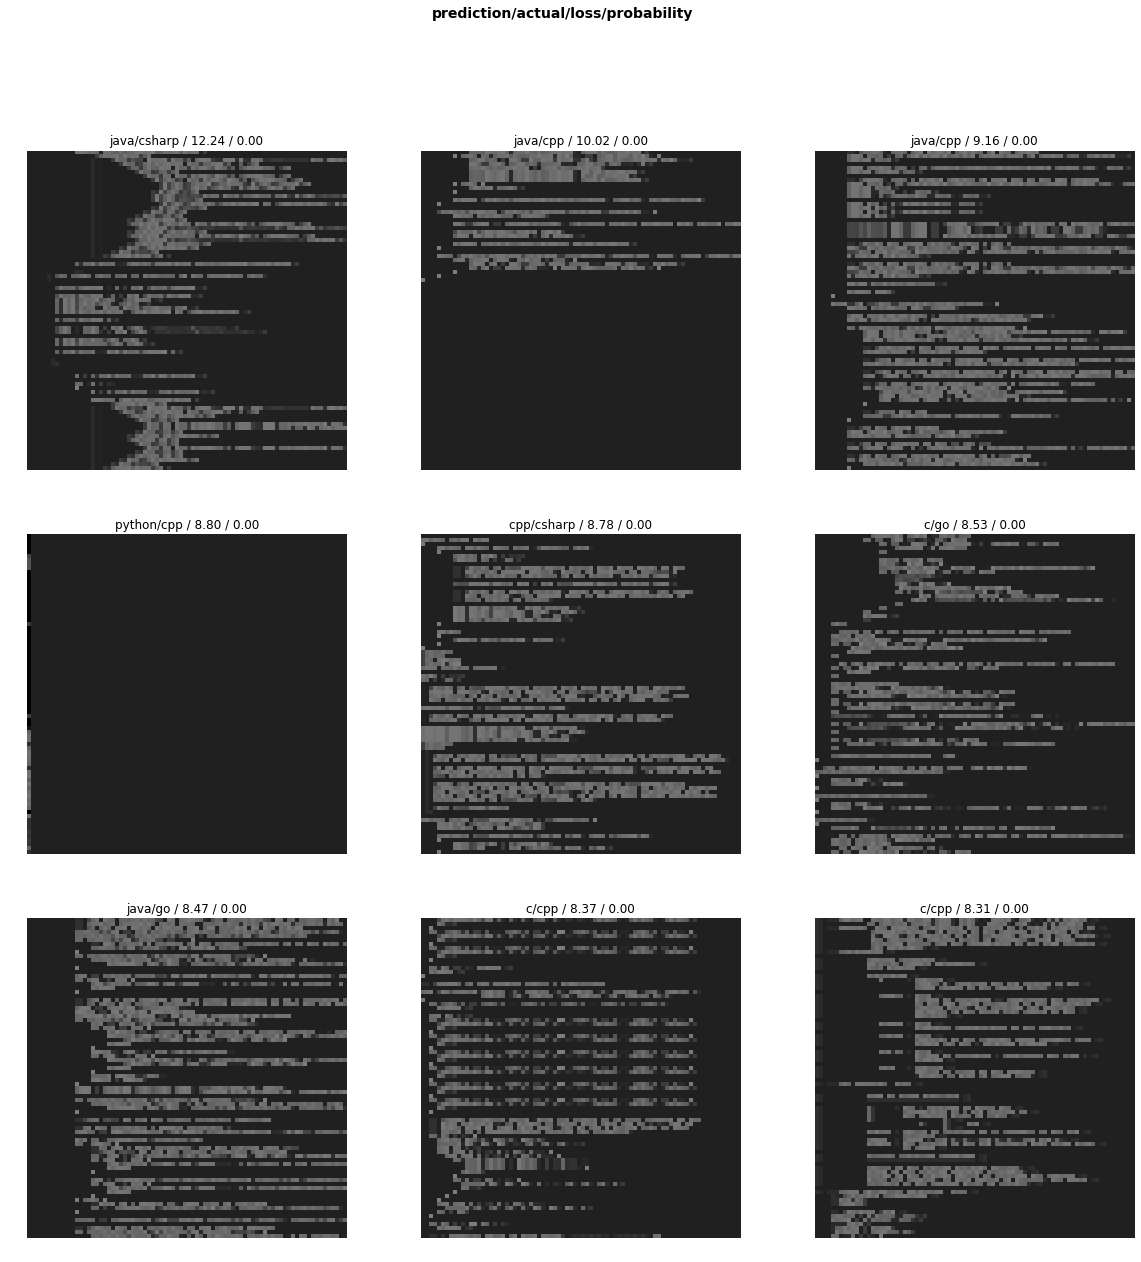

In [19]:
interp.plot_top_losses(9, figsize=(20,20))

In [21]:
interp.most_confused()

[('cpp', 'csharp', 6),
 ('cpp', 'c', 5),
 ('cpp', 'go', 4),
 ('csharp', 'go', 4),
 ('java', 'rust', 3),
 ('python', 'rust', 3),
 ('csharp', 'cpp', 2),
 ('rust', 'c', 2),
 ('c', 'cpp', 1),
 ('c', 'rust', 1),
 ('csharp', 'c', 1),
 ('go', 'c', 1),
 ('go', 'cpp', 1),
 ('go', 'rust', 1),
 ('python', 'cpp', 1)]